# Análise de dados

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
# HashMap de estados por região
regioes = {"Norte": {"PA", "RR", "AP", "AM", "TO", "RO", "AC", "MA"},
           "Nordeste": {"SE", "CE", "PB", "AL", "RN", "PE", "BA", "PI"},
           "Sudeste": {"MG", "RJ", "SP", "ES"},
           "Centro-Oeste": {"DF", "MS", "MT", "GO"},
           "Sul": {"PR", "SC", "RS"}}
# Lista de estados
lista_estados = []
for regiao in regioes:
    lista_estados += list(regioes[regiao])

## Percentual de mortes de pessoas negras em relação ao número total de mortes em acidente de transporte nos municípios brasileiros. Seguindo critério adotado pelo IBGE, foram consideradas negras, a soma das pessoas pretas e pardas.
Arquivo: [proporcao_mortes_negras_acidente_transporte](https://basedosdados.org/dataset/br-mobilidados-indicadores?bdm_table=proporcao_mortes_negras_acidente_transporte)

In [3]:
df_prop_mortes = pd.read_csv("../datasets/proporcao_mortes_negras_acidente_transporte.csv")

In [4]:
df_prop_mortes.head()

,ano,sigla_uf,id_municipio,indicador,prop_mortes_negras_acidente_transporte
0,2000,RO,1100015,Total,50.000000
1,2000,RO,1100023,Total,42.857143
2,2000,RO,1100031,Total,0.000000
3,2000,RO,1100049,Total,73.333333
4,2000,RO,1100056,Total,50.000000


## Orçamento de municípios por função
Arquivos:<br>
[finbra_2021.csv](https://drive.google.com/file/d/1bR2g3AZJORRJjTBCVQnqbCPCvO_VnuYD/view?usp=sharing)<br>
[finbra_2013.csv](https://drive.google.com/file/d/1jtf2Gi_IM_3BGu6awFgD17Wnofe_U5Vy/view?usp=sharing)<br>
[Fonte](https://siconfi.tesouro.gov.br/siconfi/pages/public/consulta_finbra/finbra_list.jsf)

In [5]:
despesas_2021 = pd.read_csv("../outros/finbra_2021.csv")

In [6]:
despesas_2021.head()

,Instituicao,Cod_municipio,UF,Populacao,Coluna,Conta,Identificador_Conta,Valor,Unnamed: 8
0,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,Despesas Exceto Intraor�ament�rias,siconfi-cor_TotalDespesas,30819758.0,NaN
1,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,01 - Legislativa,siconfi-cor_TotalDespesas,982533.0,NaN
2,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,01.031 - A��o Legislativa,siconfi-cor_TotalDespesas,982533.0,NaN
3,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,04 - Administra��o,siconfi-cor_TotalDespesas,2587777.0,41.0
4,Prefeitura Municipal de Ibiraiaras - RS,4309902.0,RS,7265.0,Despesas Empenhadas,04.122 - Administra��o Geral,siconfi-cor_TotalDespesas,1872925.0,38.0


In [7]:
despesas_2013 = pd.read_csv("../outros/finbra_2013.csv")

In [8]:
despesas_2013.head()

,Instituicao,Cod_municipio,UF,Populacao,Coluna,Conta,Identificador_Conta,Valor,Unnamed: 8
0,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,Despesas (Exceto Intra-Or�ament�rias),siconfi-cor_TotalDespesas,13531296.0,NaN
1,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,04 - Administra��o,siconfi-cor_TotalDespesas,3089348.0,NaN
2,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,04.122 - Administra��o Geral,siconfi-cor_TotalDespesas,3089348.0,NaN
3,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,08 - Assist�ncia Social,siconfi-cor_TotalDespesas,589100.0,34.0
4,Prefeitura Municipal de Sulina - PR,4126652.0,PR,3366.0,Despesas Empenhadas,08.241 - Assist�ncia ao Idoso,siconfi-cor_TotalDespesas,8854.0,49.0


## Tratamento dos dados da tabela sobre mortes negras

In [9]:
df_prop_mortes.rename(columns = {"prop_mortes_negras_acidente_transporte": "prop_mortes"}, inplace=True)

#### Observação
O dataset possui 3.240 linhas com o campo *id_municipio* vazio, então achei que seria melhor excluirmos essas linhas a fim de manter os dados mais consistentes.

In [10]:
# Linhas com id_municipio vazio
df_prop_mortes[df_prop_mortes["id_municipio"] == " "]

,ano,sigla_uf,id_municipio,indicador,prop_mortes
258,2000,PA,,Total,100.000000
976,2000,CE,,Total,83.333333
1086,2000,RN,,Total,0.000000
1165,2000,RN,,Total,100.000000
1396,2000,PB,,Total,0.000000
...,...,...,...,...,...
667773,2019,RS,,Outros,0.000000
667914,2019,RS,,Outros,0.000000
667927,2019,RS,,Outros,0.000000
668105,2019,MT,,Outros,0.000000


In [11]:
df_prop_mortes = df_prop_mortes[df_prop_mortes["id_municipio"] != " "]

### Informações sobre a Tabela

In [12]:
indicadores = df_prop_mortes["indicador"].unique()
indicadores

array(['Total', 'Pedestres', 'Ciclistas', 'Motociclistas',
       'Ocupantes de automóvel', 'Outros'], dtype=object)

In [13]:
estados = df_prop_mortes["sigla_uf"].unique()
estados

array(['RO', 'AC', 'AM', 'RR', 'PA', 'AP', 'TO', 'MA', 'PI', 'CE', 'RN',
       'PB', 'PE', 'AL', 'SE', 'BA', 'MG', 'ES', 'RJ', 'SP', 'PR', 'SC',
       'RS', 'MS', 'MT', 'GO', 'DF'], dtype=object)

#### Observação
O dataset atual trata da morte de ciclistas, motoristas, pedestres, etc. Porém, para essa análise, somente as proporções totais serão usadas. Para isso, excluirei as linhas que tratam de outros tipos de acidentes.

In [14]:
df_prop_mortes = df_prop_mortes[df_prop_mortes["indicador"] == "Total"]

In [15]:
df_prop_mortes = df_prop_mortes.drop(["indicador"], axis=1)

#### Observação
Vamos manter os dados sobre proporção entre 0 e 1 para manter da mesma maneira que os dados sobre despesas

In [16]:
df_prop_mortes["prop_mortes"] = df_prop_mortes["prop_mortes"] / 100

### Os 10 municípios com maiores percentuais de mortes negras em 2000

In [17]:
df_prop_mortes[(df_prop_mortes["ano"] == 2000)].sort_values(by="prop_mortes", 
                                                            ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
3409,2000,SP,3512902,1.0
514,2000,MA,2103802,1.0
5233,2000,MT,5105002,1.0
1907,2000,BA,2906808,1.0
1905,2000,BA,2906600,1.0
1904,2000,BA,2906501,1.0
561,2000,MA,2106409,1.0
1901,2000,BA,2906204,1.0
5224,2000,MT,5104104,1.0
1887,2000,BA,2904902,1.0


### Os 10 municípios com maiores percentuais de mortes negras abaixo de 100% em 2000

In [18]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2000) & 
    (df_prop_mortes["prop_mortes"] != 1.0)
].sort_values(by="prop_mortes", ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
1542,2000,PE,2607208,0.947368
216,2000,PA,1504208,0.941176
1574,2000,PE,2609600,0.933333
489,2000,MA,2102325,0.916667
2000,2000,BA,2914653,0.916667
111,2000,AM,1302603,0.910506
186,2000,PA,1502400,0.904762
1584,2000,PE,2610608,0.900000
1050,2000,CE,2312304,0.900000
250,2000,PA,1506138,0.896552


### Os 10 municípios com maiores percentuais de mortes negras em 2019

In [19]:
df_prop_mortes[(df_prop_mortes["ano"] == 2019)].sort_values(by="prop_mortes", 
                                                            ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
638327,2019,SP,3507209,1.0
636303,2019,PB,2506251,1.0
638052,2019,MG,3170529,1.0
638054,2019,MG,3170602,1.0
636420,2019,PB,2515401,1.0
636418,2019,PB,2515203,1.0
638057,2019,MG,3170750,1.0
638058,2019,MG,3170800,1.0
636415,2019,PB,2514909,1.0
638059,2019,MG,3170909,1.0


### Os 10 municípios com maiores percentuais de mortes negras abaixo de 100% em 2019

In [20]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2019) & 
    (df_prop_mortes["prop_mortes"] != 1.0)
].sort_values(by="prop_mortes", ascending=False)[:10]

,ano,sigla_uf,id_municipio,prop_mortes
635243,2019,PA,1506807,0.975904
636982,2019,BA,2914802,0.974359
635166,2019,PA,1502400,0.971429
640432,2019,GO,5212501,0.968750
636631,2019,AL,2700300,0.967949
636936,2019,BA,2910800,0.962963
637040,2019,BA,2919553,0.960000
635591,2019,MA,2109908,0.956522
635469,2019,MA,2102325,0.956522
637116,2019,BA,2925303,0.954545


### Os 10 municípios com menores percentuais de mortes negras em 2000

In [21]:
df_prop_mortes[(df_prop_mortes["ano"] == 2000)].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
2783,2000,MG,3146255,0.0
3412,2000,SP,3513207,0.0
3411,2000,SP,3513108,0.0
3407,2000,SP,3512704,0.0
3406,2000,SP,3512605,0.0
3405,2000,SP,3512506,0.0
3404,2000,SP,3512407,0.0
3413,2000,SP,3513306,0.0
3402,2000,SP,3512209,0.0
3400,2000,SP,3512001,0.0


### Os 10 municípios com menores percentuais de mortes negras acima de 0% em 2000

In [22]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2000) & 
    (df_prop_mortes["prop_mortes"] != 0.0)
].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
4907,2000,RS,4314100,0.012346
3521,2000,SP,3522307,0.021277
4966,2000,RS,4316907,0.026316
5000,2000,RS,4318705,0.027027
3966,2000,PR,4104006,0.029412
2489,2000,MG,3122306,0.031250
5376,2000,GO,5205109,0.033333
4185,2000,PR,4119905,0.037975
2856,2000,MG,3152501,0.040000
4376,2000,SC,4204202,0.040000


### Os 10 municípios com menores percentuais de mortes negras em 2019

In [23]:
df_prop_mortes[(df_prop_mortes["ano"] == 2019)].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
638230,2019,RJ,3305158,0.0
639117,2019,PR,4116406,0.0
639116,2019,PR,4116307,0.0
637903,2019,MG,3158409,0.0
639113,2019,PR,4116059,0.0
639112,2019,PR,4116000,0.0
639111,2019,PR,4115903,0.0
639110,2019,PR,4115853,0.0
639118,2019,PR,4116505,0.0
639109,2019,PR,4115804,0.0


### Os 10 municípios com menores percentuais de mortes negras acima de 0% em 2019

In [24]:
df_prop_mortes[
    (df_prop_mortes["ano"] == 2019) & 
    (df_prop_mortes["prop_mortes"] != 0.0)
].sort_values(by="prop_mortes")[:10]

,ano,sigla_uf,id_municipio,prop_mortes
639364,2019,SC,4204608,0.027027
638949,2019,PR,4104204,0.042553
639579,2019,SC,4219507,0.043478
640061,2019,RS,4322608,0.047619
639138,2019,PR,4117701,0.052632
639385,2019,SC,4205902,0.052632
639951,2019,RS,4317202,0.052632
638849,2019,SP,3554003,0.052632
638946,2019,PR,4104006,0.052632
639506,2019,SC,4214805,0.058824


## Tratamento dos dados das tabelas de despesas

#### Observação:
Apenas as linhas de despesas necessariamente pagas relacionadas a gastos com transporte serão usadas, já que outros tipos de investimento não serão necessários par essa análise. Também somente serão usadas as colunas com o código do município, sigla da unidade federativa e o valor da despesa paga em transporte.

In [25]:
desp_2021 = despesas_2021[
    (despesas_2021["Conta"] == "26 - Transporte") & 
    (despesas_2021["Coluna"] == "Despesas Pagas")
][["Cod_municipio", "UF", "Valor"]]
desp_2021.columns = ["id_municipio", "sigla_uf", "valor"]
desp_2021.head()

,id_municipio,sigla_uf,valor
137,4309902.0,RS,3766701.0
378,4308201.0,RS,16815173.0
578,4211652.0,SC,1835225.0
730,4315156.0,RS,3025385.0
965,4314001.0,RS,2612626.0


In [26]:
desp_2013 = despesas_2013[
    (despesas_2013["Conta"] == "26 - Transporte") & 
    (despesas_2013["Coluna"] == "Despesas Pagas")
][["Cod_municipio", "UF", "Valor"]]
desp_2013.columns = ["id_municipio", "sigla_uf", "valor"]
desp_2013.head()

,id_municipio,sigla_uf,valor
98,4126652.0,PR,1583648.0
259,4206652.0,SC,1582579.0
457,4310405.0,RS,413069.0
625,4322533.0,RS,1378911.0
866,4318705.0,RS,774243.0


### Médias de investimento das regiões em 2021

In [27]:
lista_medias = []
for regiao in regioes:
  media = int(desp_2021[desp_2021["sigla_uf"].isin(regioes[regiao])]["valor"].mean())
  lista_medias.append(media)

desp_med_2021 = pd.DataFrame(lista_medias, 
                             index=regioes, 
                             columns=["media"]).sort_values(by="media", ascending=False)

In [28]:
desp_med_2021

,media
Sudeste,6844551
Centro-Oeste,3880576
Norte,3302650
Sul,3201229
Nordeste,1122277


In [29]:
lista_medias = []
for regiao in regioes:
  media = int(desp_2013[desp_2013["sigla_uf"].isin(regioes[regiao])]["valor"].mean())
  lista_medias.append(media)

desp_med_2013 = pd.DataFrame(lista_medias, 
                             index=regioes, 
                             columns=["media"]).sort_values(by="media", ascending=False)

In [30]:
desp_med_2013

,media
Sudeste,3644537
Centro-Oeste,1835748
Sul,1639701
Norte,1339501
Nordeste,469182


### Aumento em porcentagem do investimento em transporte entre 2013 e 2021 de cada região

In [31]:
variacao_media_prop = ((desp_med_2021 - desp_med_2013) / desp_med_2013).sort_values(by="media", ascending=False)
variacao_media_prop.columns=["variação média"]

In [32]:
variacao_media_prop

,variação média
Norte,1.465582
Nordeste,1.391986
Centro-Oeste,1.113894
Sul,0.952325
Sudeste,0.878030


## Análise dos Dados

In [33]:
periodo_prop_mortes = range(2000, 2020)

### Analisando a média da porcentagem de mortes totais por região durante o período de 2000 a 2019

In [34]:
def get_media_prop_by_regiao(regiao, ano):
    """
    :param regiao: região a ser selecionada
    :param indicador: indicador a ser selecionado
    :param ano: ano a ser selecionado
    :return: média do percentual de pessoas próximas a redes de transporte
    """
    media = df_prop_mortes[(df_prop_mortes["ano"] == ano) &
                           (df_prop_mortes["sigla_uf"].isin(regioes[regiao]))]["prop_mortes"].mean()
    return media

In [35]:
medias_regiao = [get_media_prop_by_regiao(regiao, ano) 
                 for ano in periodo_prop_mortes
                 for regiao in regioes]

df_med_prop_mortes = pd.DataFrame(np.array(medias_regiao).reshape(20, 5),
                   index=periodo_prop_mortes, columns=regioes)
df_med_prop_mortes.index.name, df_med_prop_mortes.columns.name = "ano", "regiões"
df_med_prop_mortes

regiões,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
ano,,,,,
2000,0.295604,0.303492,0.125809,0.250415,0.067097
2001,0.313526,0.315945,0.125487,0.256372,0.049464
2002,0.338348,0.363575,0.159104,0.271929,0.057039
2003,0.376528,0.358494,0.166776,0.306951,0.047606
2004,0.411097,0.391302,0.184722,0.332621,0.065427
2005,0.421006,0.429307,0.187185,0.347637,0.055093
2006,0.420119,0.457868,0.189332,0.346781,0.053443
2007,0.474160,0.491326,0.197438,0.336925,0.056860
2008,0.489659,0.510393,0.221878,0.380990,0.056170


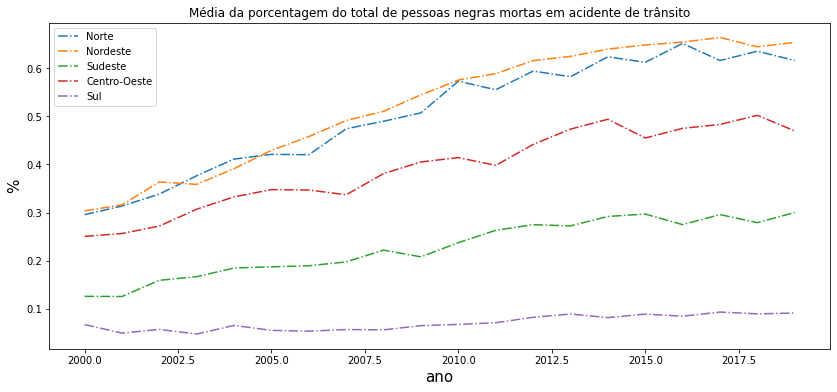

In [36]:
plt.figure(figsize=(14,6))
plt.plot(df_med_prop_mortes, '-.')
plt.title("Média da porcentagem do total de pessoas negras mortas em acidente de trânsito")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos notar que houve aumento no porcentagem de mortes de pessoas negras no trânsito em todas as regiões. Todas as regiões, exceto a Sul, praticamente dobraram suas porcentagens de 2000 para 2019. A região Sul foi a que teve o menor aumento, variando de 6% em 2000 para 9% ao fim de 2019.

### Analisando a variação da porporção de mortes entre os municípios nas regiões

In [37]:
df_prop_2000 = df_prop_mortes[df_prop_mortes["ano"] == 2000]
df_prop_2000.index = df_prop_2000["id_municipio"]
df_prop_2000 = df_prop_2000.drop(["id_municipio", "ano"], axis=1)
df_prop_2000.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,0.500000
1100023,RO,0.428571
1100031,RO,0.000000
1100049,RO,0.733333
1100056,RO,0.500000


In [38]:
df_prop_2013 = df_prop_mortes[df_prop_mortes["ano"] == 2013]
df_prop_2013.index = df_prop_2013["id_municipio"]
df_prop_2013 = df_prop_2013.drop(["id_municipio", "ano"], axis=1)
df_prop_2013.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,0.285714
1100023,RO,0.607843
1100031,RO,0.000000
1100049,RO,0.555556
1100056,RO,0.428571


In [39]:
df_prop_2019 = df_prop_mortes[df_prop_mortes["ano"] == 2019]
df_prop_2019.index = df_prop_2019["id_municipio"]
df_prop_2019 = df_prop_2019.drop(["id_municipio", "ano"], axis=1)
df_prop_2019.head()

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,0.600000
1100023,RO,0.846154
1100031,RO,1.000000
1100049,RO,0.641791
1100056,RO,0.500000


In [40]:
coluna_dif_2000 = df_prop_2013["prop_mortes"] - df_prop_2000["prop_mortes"]
df_diferenca_prop_2000 = pd.DataFrame(df_prop_2000)
df_diferenca_prop_2000["diferenca"] = coluna_dif_2000
df_diferenca_prop_2000 = df_diferenca_prop_2000.drop(["prop_mortes"], axis=1)
df_diferenca_prop_2000.head()

,sigla_uf,diferenca
id_municipio,,
1100015,RO,-0.214286
1100023,RO,0.179272
1100031,RO,0.000000
1100049,RO,-0.177778
1100056,RO,-0.071429


In [41]:
coluna_dif_2013 = df_prop_2019["prop_mortes"] - df_prop_2013["prop_mortes"]
df_diferenca_prop_2013 = pd.DataFrame(df_prop_2013)
df_diferenca_prop_2013["diferenca"] = coluna_dif_2013
df_diferenca_prop_2013 = df_diferenca_prop_2013.drop(["prop_mortes"], axis=1)
df_diferenca_prop_2013.head()

,sigla_uf,diferenca
id_municipio,,
1100015,RO,0.314286
1100023,RO,0.238311
1100031,RO,1.000000
1100049,RO,0.086235
1100056,RO,0.071429


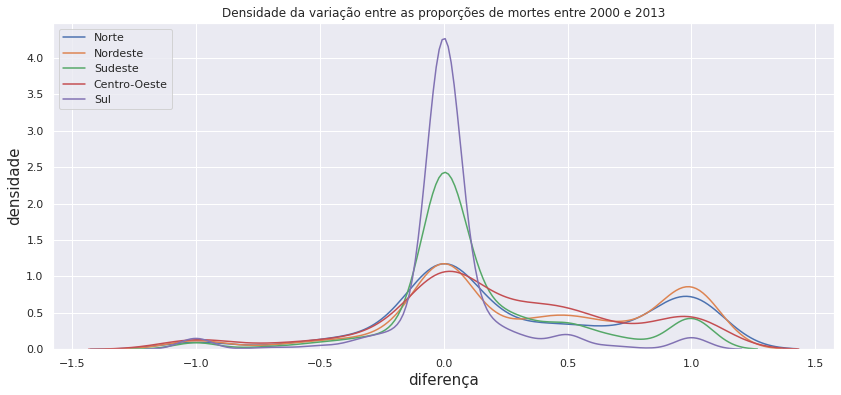

In [42]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_diferencas = df_diferenca_prop_2000[df_diferenca_prop_2000["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    sns.kdeplot(regiao_diferencas)
plt.title("Densidade da variação entre as proporções de mortes entre 2000 e 2013")
plt.xlabel("diferença", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

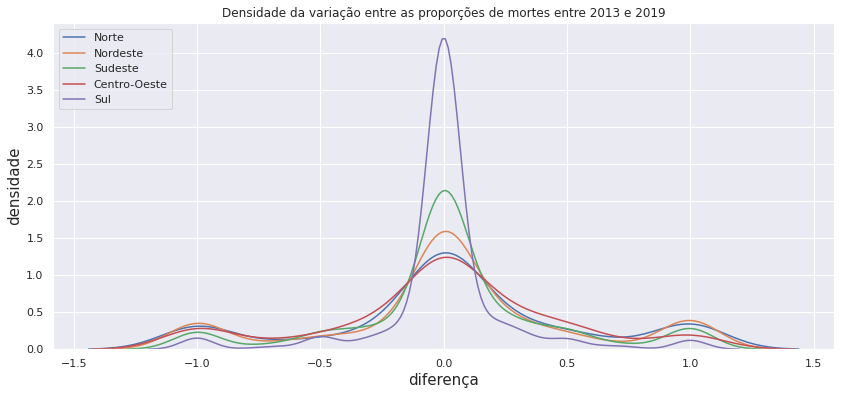

In [43]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_diferencas = df_diferenca_prop_2013[df_diferenca_prop_2013["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    sns.kdeplot(regiao_diferencas)
plt.title("Densidade da variação entre as proporções de mortes entre 2013 e 2019")
plt.xlabel("diferença", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
Podemos ver que a região Sul foi a que manteve a maior parte de seus municípios sem uma mudança significativa das mortes. A região Sudeste também apresenta pouca mudança em boa parte dos seus municípios, porém já apresenta um certo grau de desigualdade, visto que existem outros muitos municípios com aumentos significativos na proporção de negros mortos em acidentes no transporte. Por fim, é perceptível que as regiões Norte, Nordeste e Centro-Oeste apresentam uma desigualdade acentuada no aumento de proporção, com boa parte de seus municípios tendo aumento de 50% a 100%, enquanto outros não apresentam mudanças significativas.

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2000

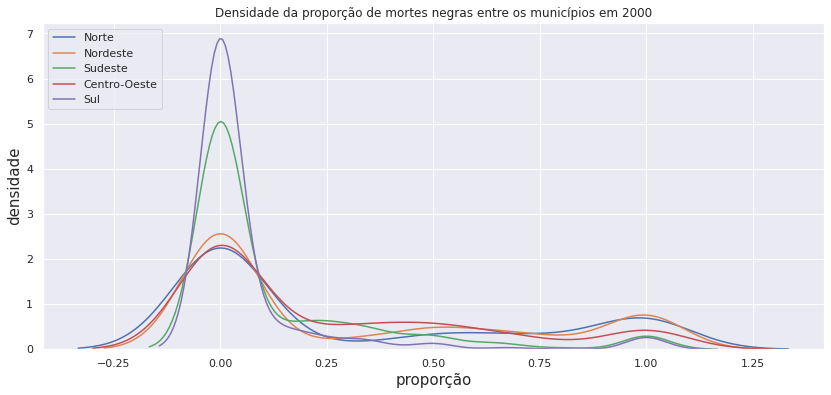

In [44]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2000[df_prop_2000["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2000")
plt.xlabel("proporção", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2013

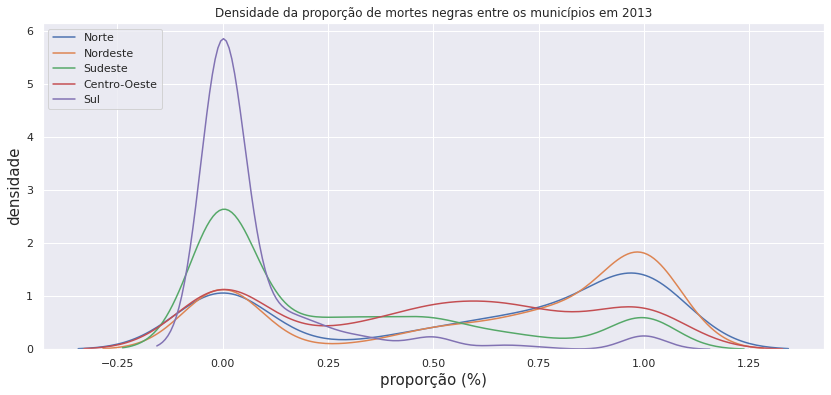

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2013[df_prop_2013["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2013")
plt.xlabel("proporção (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

### Analisando a proporção de mortes negras entre os municípios nas regiões em 2019

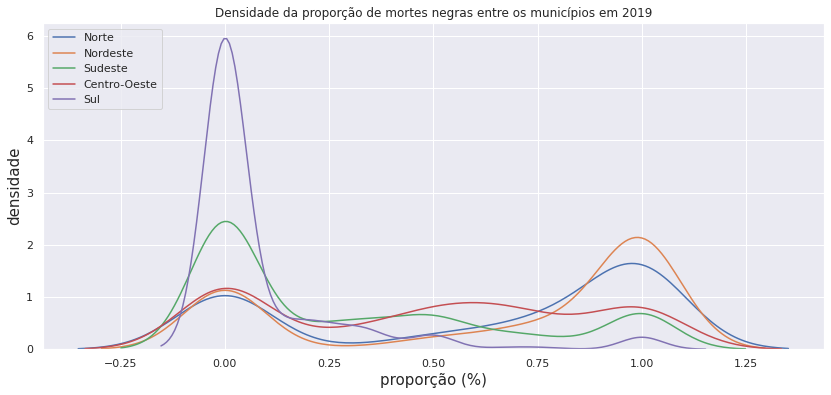

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_proporcoes = df_prop_2019[df_prop_2019["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    sns.kdeplot(regiao_proporcoes)
plt.title("Densidade da proporção de mortes negras entre os municípios em 2019")
plt.xlabel("proporção (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Observação
A partir do primeiro gráfico, podemos observar que a maioria dos municípios apresentavam uma proporção baixa de mortes negras. Entretanto, já é possível perceber que as regiões Norte, Nordeste e Centro-Oeste já se distoam bastante da Sudeste e Sul, apresentando muitos municípios com proporções acima de 50%.<br>
No segundo gráfico, é possível perceber que a região Sul se manteve próxima da sua situação anterior, enquanto todas as outras regiões apresentaram um aumento na maioria dos seus municípios de mortes negras. Os casos de maior aumento talvez sejam das regiões Norte e Nordeste, onde o número de municípios com proporção próximo de 100% aumentou enormemente.

### Analisando a variação das despesas em transporte nos municípios nas regiões

In [47]:
desp_2013.index = desp_2013["id_municipio"].astype(int)
desp_2013 = desp_2013.drop(["id_municipio"], axis=1)
desp_2013

,sigla_uf,valor
id_municipio,,
4126652,PR,1583648.0
4206652,SC,1582579.0
4310405,RS,413069.0
4322533,RS,1378911.0
4318705,RS,774243.0
...,...,...
1500404,PA,1286655.0
1503309,PA,353916.0
2505279,PB,115926.0


In [48]:
desp_2021.index = desp_2021["id_municipio"].astype(int)
desp_2021 = desp_2021.drop(["id_municipio"], axis=1)
desp_2021

,sigla_uf,valor
id_municipio,,
4309902,RS,3766701.0
4308201,RS,16815173.0
4211652,SC,1835225.0
4315156,RS,3025385.0
4314001,RS,2612626.0
...,...,...
3532157,SP,384336.0
4206702,SC,4673928.0
1703909,TO,170065.0


In [49]:
dif_despesa = pd.DataFrame(desp_2013["sigla_uf"])
dif_despesa["diferenca"] = (desp_2021["valor"] - desp_2013["valor"]) / desp_2013["valor"]
dif_despesa = dif_despesa.dropna()
dif_despesa.head()

,sigla_uf,diferenca
id_municipio,,
4126652,PR,0.897629
4206652,SC,0.548615
4310405,RS,4.477782
4322533,RS,0.494787
4318705,RS,2.647638


In [50]:
dif_despesa = dif_despesa[(dif_despesa["diferenca"] > -2) & (dif_despesa["diferenca"] < 2)]

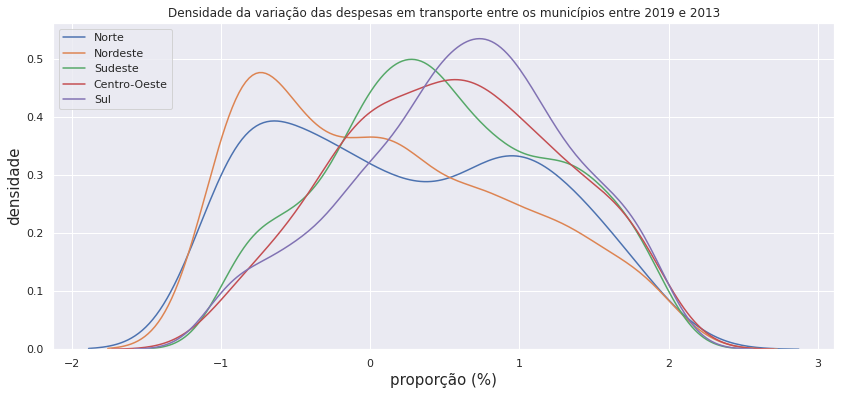

In [51]:
sns.set(style="darkgrid")
plt.figure(figsize=(14,6))
for regiao in regioes:
    regiao_diferencas = dif_despesa[dif_despesa["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    sns.kdeplot(regiao_diferencas)
plt.title("Densidade da variação das despesas em transporte entre os municípios entre 2019 e 2013")
plt.xlabel("proporção (%)", size=15)
plt.ylabel("densidade", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

In [52]:
dif_despesa.sort_values(by="diferenca", ascending=False)

,sigla_uf,diferenca
id_municipio,,
3105509,MG,1.995795
3530409,SP,1.991617
1712009,TO,1.985166
4206306,SC,1.984162
4320800,RS,1.981526
...,...,...
3129103,MG,-0.999312
2106805,MA,-0.999697
4126009,PR,-0.999756


In [53]:
dif_despesa_prop_2000 = dif_despesa.copy()
dif_despesa_prop_2000.rename(columns = {"diferenca": "diferenca_desp"}, inplace=True)
dif_despesa_prop_2000["diferenca_prop_2000"] = df_diferenca_prop_2000["diferenca"] / 100
dif_despesa_prop_2000

,sigla_uf,diferenca_desp,diferenca_prop_2000
id_municipio,,,
4126652,PR,0.897629,NaN
4206652,SC,0.548615,NaN
4322533,RS,0.494787,NaN
2200608,PI,0.141221,NaN
4300703,RS,1.500907,NaN
...,...,...,...
3171709,MG,1.834136,NaN
1500404,PA,-0.698372,NaN
1503309,PA,0.102533,NaN


In [54]:
len(dif_despesa_prop_2000[dif_despesa_prop_2000["diferenca_prop_2000"].isnull()])

2579

#### Observação:
Como não há nenhum município presente nos dois conjuntos de dados, farei uma análise a partir dos estados para as regiões.

In [55]:
media_dif_prop_2000 = {}
media_dif_prop_2013 = {}
media_dif_despesa = {}
for estado in lista_estados:
    media_dif_prop_2000[estado] = df_diferenca_prop_2000[
        df_diferenca_prop_2000["sigla_uf"] == estado]["diferenca"].mean()
    media_dif_prop_2013[estado] = df_diferenca_prop_2013[
        df_diferenca_prop_2013["sigla_uf"] == estado]["diferenca"].mean()
    media_dif_despesa[estado] = dif_despesa[dif_despesa["sigla_uf"] == estado]["diferenca"].mean()

In [56]:
df_media_estados = pd.DataFrame(media_dif_prop_2000, index=["dif_media_prop_2000"]).T

In [57]:
df_media_estados["dif_media_prop_2013"] = pd.DataFrame(media_dif_prop_2013, index=["dif_media_prop_2013"]).T

In [58]:
df_media_estados["dif_media_despesa"] = pd.Series(media_dif_despesa)

In [59]:
df_media_estados

,dif_media_prop_2000,dif_media_prop_2013,dif_media_despesa
MA,0.429510,0.024654,-0.006454
AP,0.223447,0.111443,0.186910
AC,0.376144,0.035437,0.414680
PA,0.336377,0.055700,0.267315
AM,0.155142,-0.050952,0.174190
RR,0.068058,-0.104322,1.478562
RO,0.146362,0.096583,0.552573
TO,0.140303,0.045310,0.298310
AL,0.234475,0.107488,0.329466
PB,0.457507,0.039758,0.243038


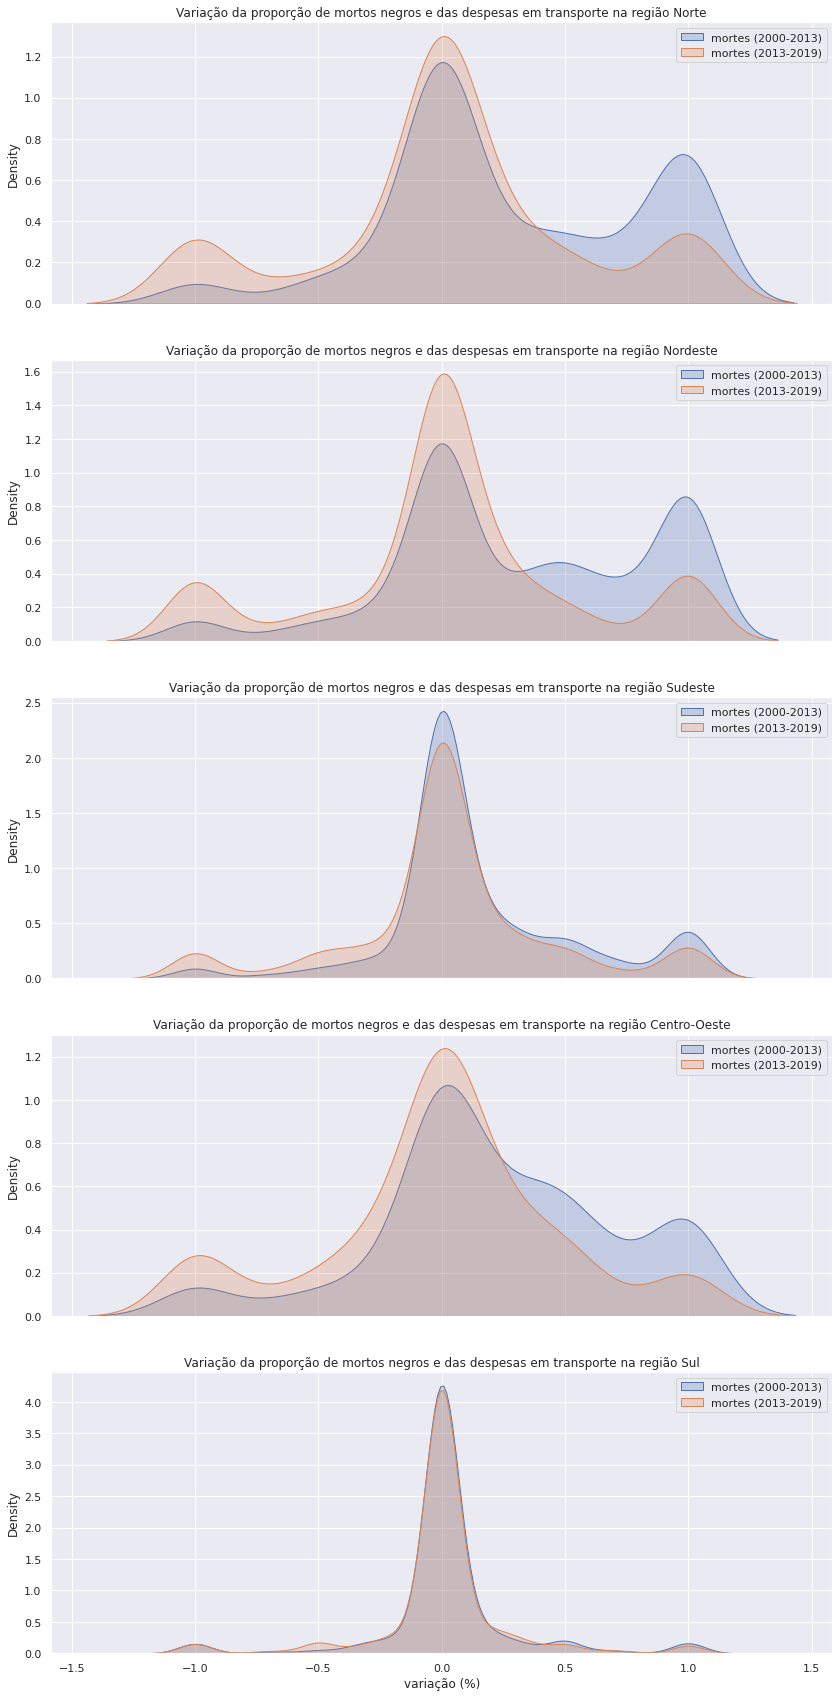

In [60]:
sns.set(style="darkgrid")
f, axes = plt.subplots(5, 1, figsize=(14, 30), sharex=True)

for i, regiao in enumerate(regioes):
    regiao_dif_prop_2000 = df_diferenca_prop_2000[
        df_diferenca_prop_2000["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    regiao_dif_prop_2013 = df_diferenca_prop_2013[
        df_diferenca_prop_2013["sigla_uf"].isin(regioes[regiao])]["diferenca"]
    
    sns.kdeplot(regiao_dif_prop_2000, shade=True, ax=axes[i], label="mortes (2000-2013)")
    sns.kdeplot(regiao_dif_prop_2013, shade=True, ax=axes[i], label="mortes (2013-2019)")
    axes[i].set_title("Variação da proporção de mortos negros e das despesas em transporte na região " + regiao)
    axes[i].legend()
    axes[i].set_xlabel("variação (%)")
plt.show()

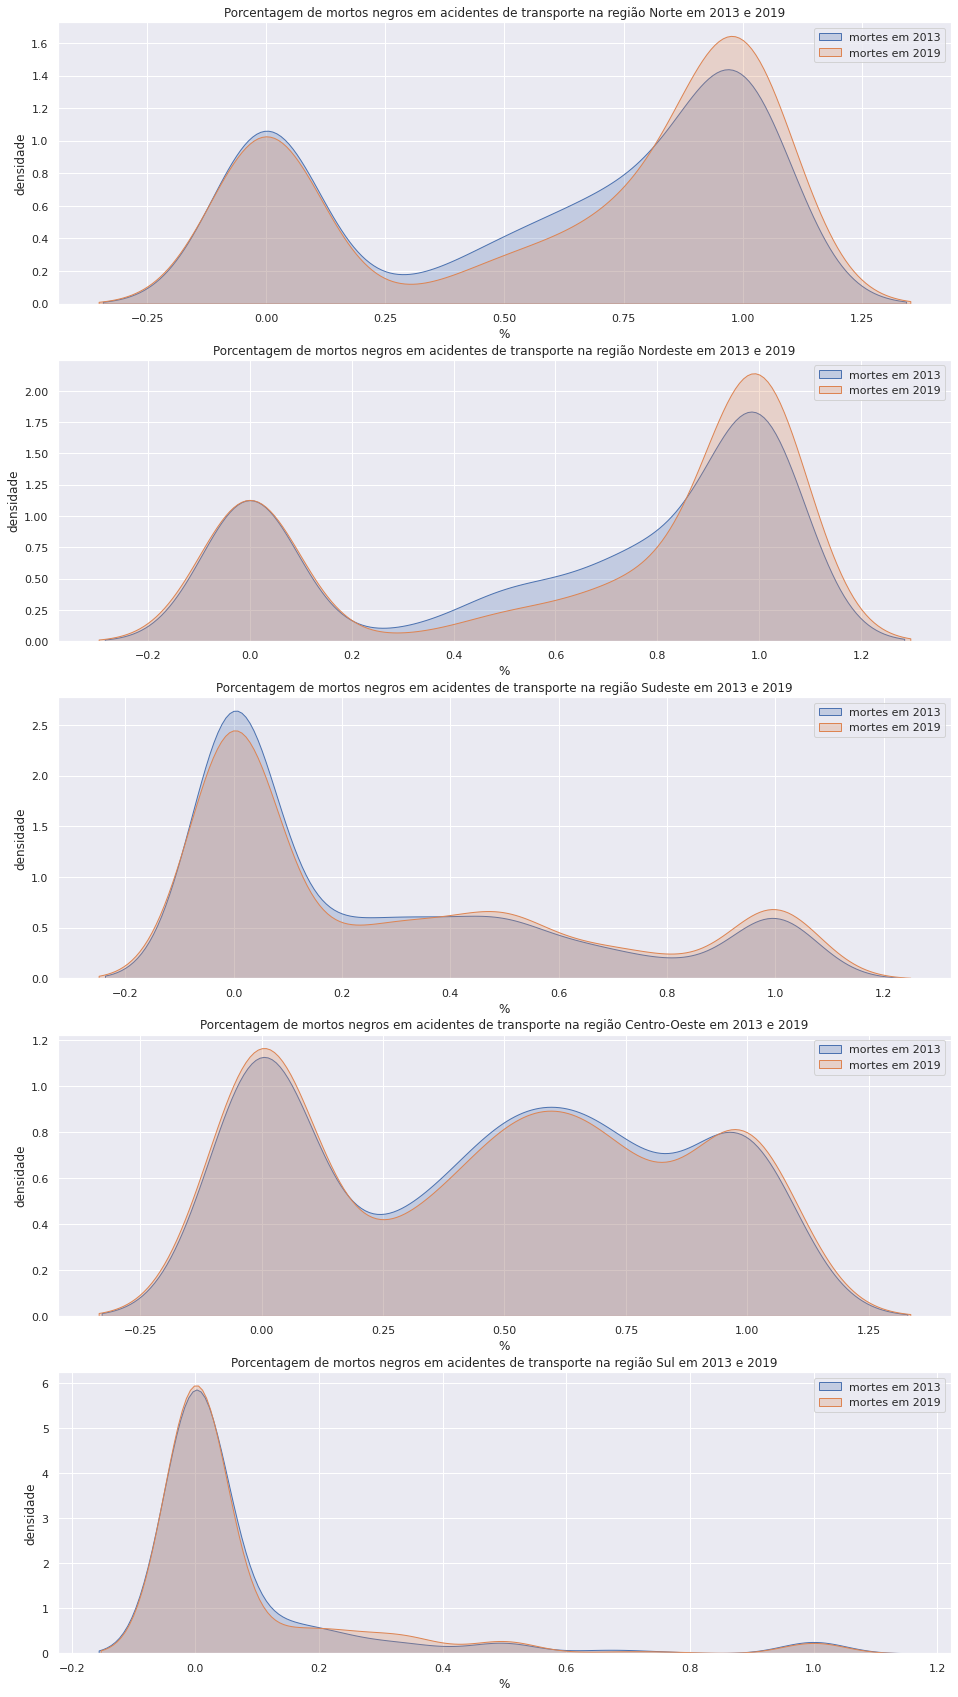

In [61]:
sns.set(style="darkgrid")
f, axes = plt.subplots(5, 1, figsize=(16, 30))

for i, regiao in enumerate(regioes):
    regiao_prop_2013 = df_prop_2013[
        df_prop_2013["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    regiao_prop_2019 = df_prop_2019[
        df_prop_2019["sigla_uf"].isin(regioes[regiao])]["prop_mortes"]
    
    sns.kdeplot(regiao_prop_2013, shade=True, ax=axes[i], label="mortes em 2013")
    sns.kdeplot(regiao_prop_2019, shade=True, ax=axes[i], label="mortes em 2019")
    axes[i].set_title("Porcentagem de mortos negros em acidentes de transporte na região " + 
                      regiao + " em 2013 e 2019")
    axes[i].legend()
    axes[i].set_xlabel("%")
    axes[i].set_ylabel("densidade")
plt.show()

In [62]:
df_prop_2019

,sigla_uf,prop_mortes
id_municipio,,
1100015,RO,0.600000
1100023,RO,0.846154
1100031,RO,1.000000
1100049,RO,0.641791
1100056,RO,0.500000
...,...,...
1504752,PA,1.000000
4212650,SC,0.000000
4220000,SC,0.000000


In [63]:
def tamanho_by_intervalo_regiao(dataframe, limite, regiao, indicador):
    if limite == 0:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] < 0)])
    if limite == 25:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] >= 0) &
                             (dataframe[indicador] <= 0.25)])
    elif limite == 50:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 0.25) &
                             (dataframe[indicador] <= 0.50)])
    elif limite == 75:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 0.50) & 
                             (dataframe[indicador] <= 0.75)])
    elif limite == 100:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 0.75) &
                             (dataframe[indicador] <= 1)])
    else:
        return len(dataframe[(dataframe["sigla_uf"].isin(regioes[regiao])) & 
                             (dataframe[indicador] > 1)])

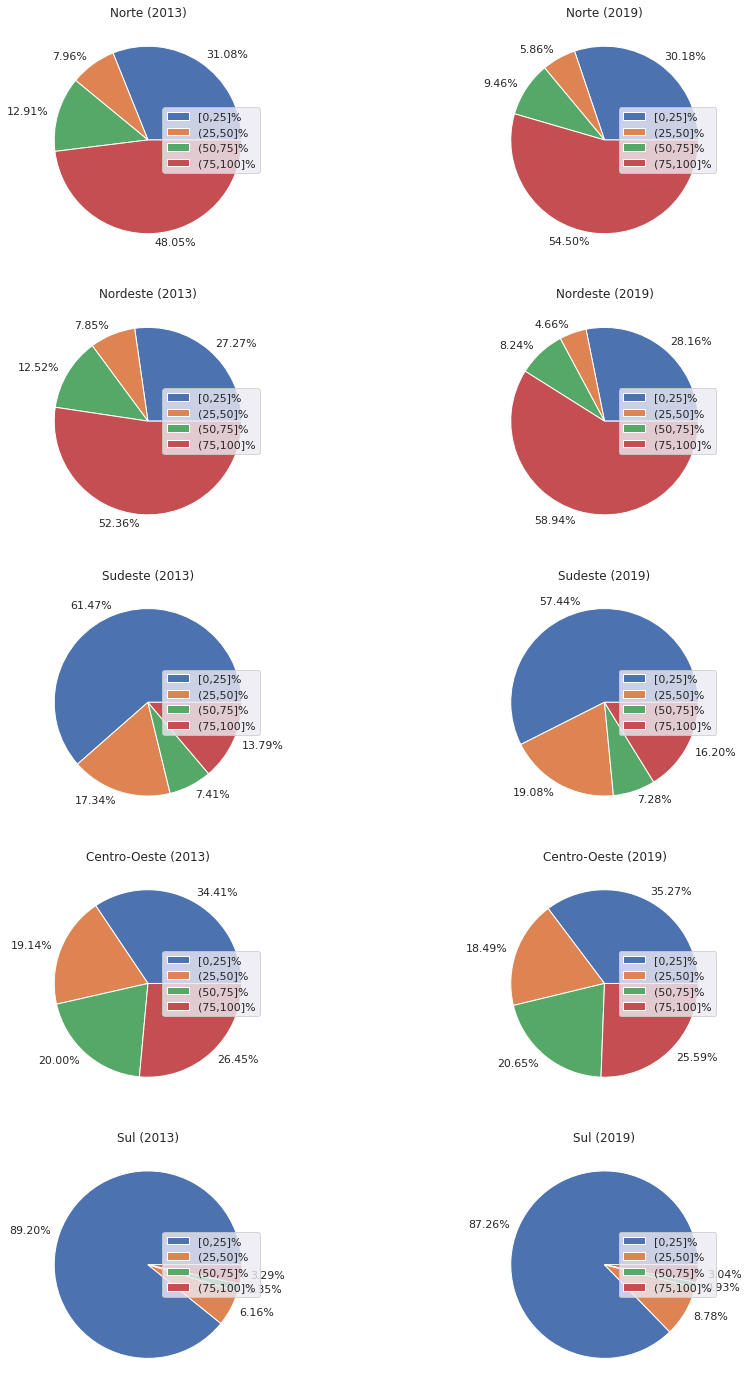

In [64]:
legenda = ["[0,25]%", "(25,50]%", "(50,75]%", "(75,100]%"]
limites = [25, 50, 75, 100]
fig, axs = plt.subplots(5, 2, figsize=(15,25))
for i, regiao in enumerate(regioes):
    for j, df_ano in enumerate([df_prop_2013, df_prop_2019]):
        total = (len(df_ano[df_ano["sigla_uf"].isin(regioes[regiao])]))
        porcentagens = []
        labels = []
        for limite in limites:
            qtd = tamanho_by_intervalo_regiao(df_ano, limite, regiao, "prop_mortes")
            porcentagens.append(qtd)
            labels.append("{0:.2f}%".format((qtd / total) * 100))
        axs[i,j].pie(porcentagens, labels=labels)
        axs[i,j].set_title("{0} ({1})".format(regiao, 2013 + j*6))
        axs[i,j].legend(legenda, loc="center right")
plt.show()

In [65]:
dif_despesa

,sigla_uf,diferenca
id_municipio,,
4126652,PR,0.897629
4206652,SC,0.548615
4322533,RS,0.494787
2200608,PI,0.141221
4300703,RS,1.500907
...,...,...
3171709,MG,1.834136
1500404,PA,-0.698372
1503309,PA,0.102533


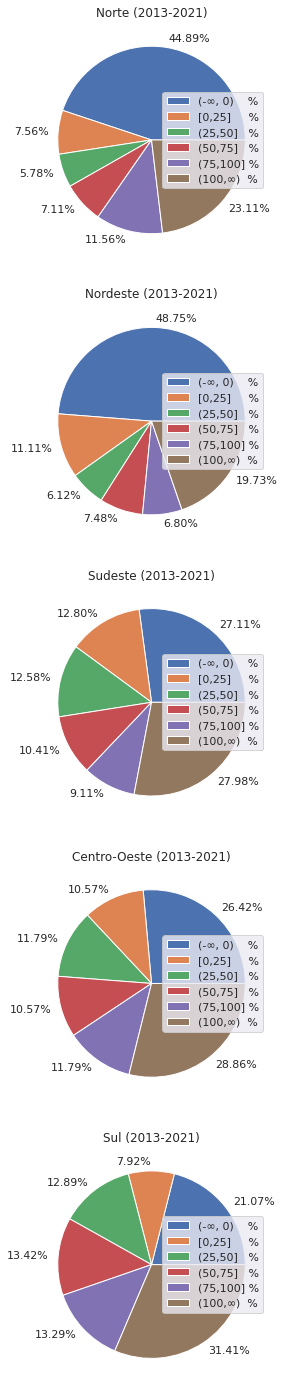

In [67]:
legenda = ["(-∞, 0)    %", "[0,25]     %", "(25,50]   %", "(50,75]   %", "(75,100] %", "(100,∞)  %"]
limites = [0, 25, 50, 75, 100, 150]
fig, axs = plt.subplots(5, 1, figsize=(15,25))
for i, regiao in enumerate(regioes):
    total = len(dif_despesa[dif_despesa["sigla_uf"].isin(regioes[regiao])])
    porcentagens = []
    labels = []
    for limite in limites:
        qtd = tamanho_by_intervalo_regiao(dif_despesa, limite, regiao, "diferenca")
        porcentagens.append(qtd)
        labels.append("{0:.2f}%".format((qtd / total) * 100))
    axs[i].pie(porcentagens, labels=labels)
    axs[i].set_title("{0} (2013-2021)".format(regiao))
    axs[i].legend(legenda, loc="center right")
plt.show()